In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [4]:
heart= pd.read_csv('heart.csv')

In [11]:
print(heart.head(10))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1     

In [12]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
heart['Sex'] = heart['Sex'].replace({'M':0 , 'F':1})

In [6]:
heart['ST_Slope'] = heart['ST_Slope'].replace({'Up':1, 'Flat':0, 'Down':-1})

In [7]:
heart['ChestPainType'] = heart['ChestPainType'].replace({'ASY':3, 'NAP':0, 'TA':1, 'ATA':2})

In [8]:
heart['RestingECG'] = heart['RestingECG'].replace({'Normal':0, 'ST':1,'LVH':2})

In [9]:
heart['ExerciseAngina'] = heart['ExerciseAngina'].replace({'N':0 , 'Y':1})

In [10]:
x= heart.iloc[:, :-1]
y= heart.iloc[:, -1]

In [61]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,0,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,3,138,214,0,0,108,1,1.5,0,1
4,54,0,0,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,1,110,264,0,0,132,0,1.2,0,1
914,68,0,3,144,193,1,0,141,0,3.4,0,1
915,57,0,3,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,2,174,0,0.0,0,1


In [11]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,0,0.0,1
1,49,1,0,160,180,0,0,156,0,1.0,0
2,37,0,2,130,283,0,1,98,0,0.0,1
3,48,1,3,138,214,0,0,108,1,1.5,0
4,54,0,0,150,195,0,0,122,0,0.0,1


In [12]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [13]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [26]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 734 samples 
test set size: 184 samples


In [14]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [15]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[ 70.    0.    3.  140.    0.    1.    0.  157.    1.    2.    0. ]
 [ 46.    0.    3.  115.    0.    0.    0.  113.    1.    1.5   0. ]
 [ 65.    1.    0.  160.  360.    0.    2.  151.    0.    0.8   1. ]
 [ 66.    0.    3.  140.  139.    0.    0.   94.    1.    1.    0. ]
 [ 59.    0.    3.  140.    0.    0.    1.  117.    1.    1.    0. ]]

x train after Normalization
[[0.31569989 0.         0.01353    0.63139979 0.         0.00451
  0.         0.70806976 0.00451    0.00902    0.        ]
 [0.27430442 0.         0.01788942 0.68576104 0.         0.
  0.         0.67383476 0.00596314 0.00894471 0.        ]
 [0.15226507 0.00234254 0.         0.37480631 0.84331421 0.
  0.00468508 0.35372346 0.         0.00187403 0.00234254]
 [0.28908467 0.         0.01314021 0.61320991 0.60882984 0.
  0.         0.41172666 0.00438007 0.00438007 0.        ]
 [0.30763401 0.         0.01564241 0.729979   0.         0.
  0.00521414 0.61005388 0.00521414 0.00521414 0.        ]]


Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

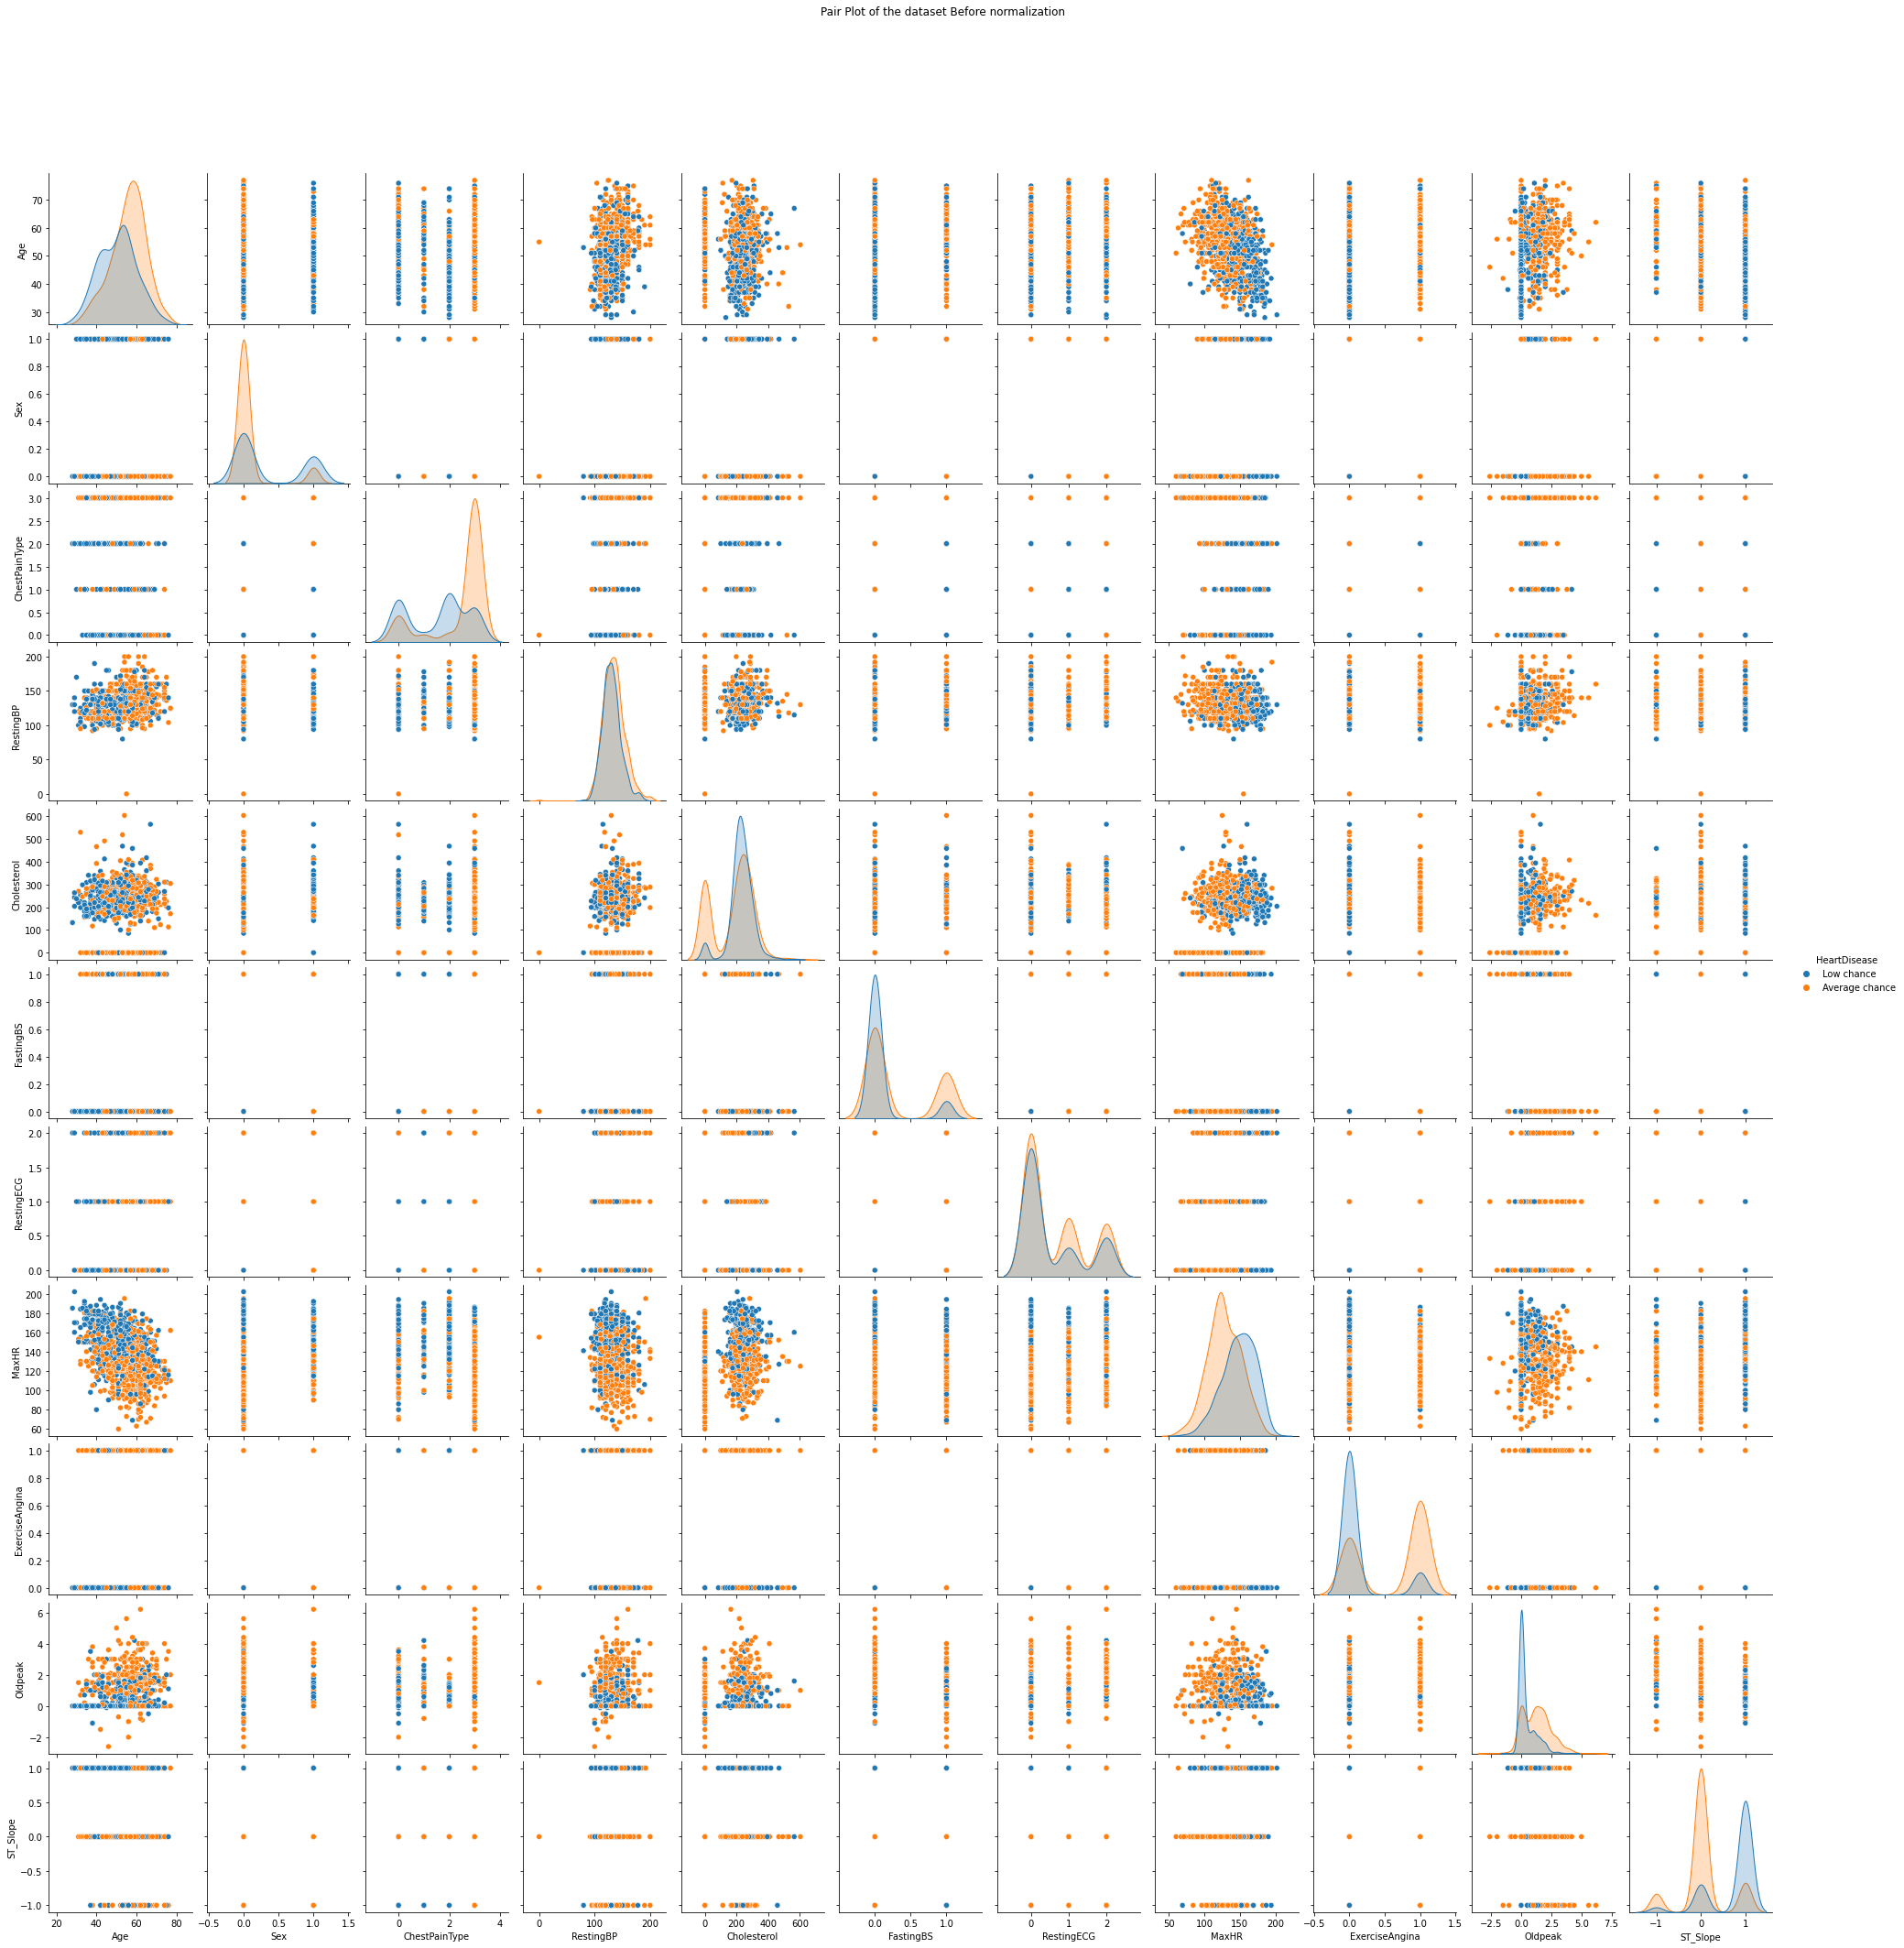

In [16]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Low chance', 1.0: 'Average chance', 2.0:'High Chance'} # dictionary

before= sns.pairplot(heart.replace({'HeartDisease': di}), hue= 'HeartDisease')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)
#after many attempts, we proceeded to try and do it without normalization

In [25]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


In [26]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [27]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

In [28]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over the entirety of the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  


In [29]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [30]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1]


In [31]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [32]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')
#accuracy for both is 0.69 (nice lmao) 

The accuracy of our implementation is 0.6902173913043478
The accuracy of sklearn implementation is 0.6902173913043478


In [ ]:
# 2 interesting cases where kNN algorythms are used 
#1: For detecting credit card fraud
#2: Knn can search for semantically similar documents

In [33]:
#difference with k
K=4
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [34]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1]


In [35]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

False


In [36]:
K=5
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [37]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1]


In [38]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [39]:
#differences in tests now used 10/90
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.1,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [40]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 826 samples 
test set size: 92 samples


In [44]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [45]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[ 43.    1.    2.  150.  186.    0.    0.  154.    0.    0.    1. ]
 [ 56.    1.    2.  120.  279.    0.    0.  150.    0.    1.    0. ]
 [ 58.    0.    3.  115.    0.    1.    0.  138.    0.    0.5   1. ]
 [ 35.    1.    3.  138.  183.    0.    0.  182.    0.    1.4   1. ]
 [ 38.    0.    0.  115.    0.    0.    0.  128.    1.    0.    0. ]]

x train after Normalization
[[0.14955549 0.00347803 0.00695607 0.52170521 0.64691446 0.
  0.         0.53561734 0.         0.         0.00347803]
 [0.16310318 0.00291256 0.00582511 0.34950682 0.81260336 0.
  0.         0.43688353 0.         0.00291256 0.        ]
 [0.30720852 0.         0.0158901  0.60912034 0.         0.0052967
  0.         0.7309444  0.         0.00264835 0.0052967 ]
 [0.11873281 0.00339237 0.0101771  0.46814651 0.62080298 0.
  0.         0.61741062 0.         0.00474931 0.00339237]
 [0.21563777 0.         0.         0.65258797 0.         0.
  0.         0.72635879 0.00567468 0.         0.        ]

In [46]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [47]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1]


In [48]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [49]:
K=4
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [50]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0]


In [51]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))
#even with a larger training set, k=4 still shows inconsistencies, possible reasons: outliers, odd/inconsistent inputs

False


In [52]:
K=10
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [53]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1]


In [54]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))
#with k=10, the result also seems false. Possible solution:we must find the proper balace between k and training size 

False


In [55]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')
#accuracy of k 10 is higher than k 3, mayhaps becuase of outliers down the line

The accuracy of our implementation is 0.782608695652174
The accuracy of sklearn implementation is 0.75


In [56]:
#kfold
n_splits= 3 ## Choose the number of splits ##changed to 3 for comparison puposes, will use 4 later on
kf= KFold(n_splits= n_splits) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train): ## Loop over the splits
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)

In [57]:
print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}')

The accuracy for each K value was [(0.618616600790514, 1), (0.6392182696530523, 3), (0.6864339042599913, 5), (0.6900834431269214, 7), (0.7119016249451032, 9), (0.7070487483530963, 11), (0.7106675450153711, 13), (0.7009837505489679, 15), (0.7094554238032499, 17), (0.713078612209047, 19), (0.7118840579710145, 21), (0.7179270970575319, 23), (0.7215678524374177, 25), (0.7215678524374177, 27), (0.7167413263065437, 29)]


In [58]:
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.7215678524374177, which corresponds to a value of K= 25


In [59]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [60]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1]


In [61]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [62]:
##we shall now try with n4 k4
n_splits= 4 ## Choose the number of splits ##changed to 3 for comparison puposes, will use 4 later on
kf= KFold(n_splits= n_splits) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train): ## Loop over the splits
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)

In [63]:
K=4
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]


In [64]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0]


In [65]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

False
